In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys 
import os
import time
import sklearn 
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for model in mpl, np, pd, sklearn, tf, keras:
    print(model.__name__, model.__version__)


2.0.0
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.19.0
pandas 1.0.5
sklearn 0.23.1
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
# 分类问题
# fashion_mnist 时尚衣服、鞋子、包
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:10000], x_train_all[10000:]
y_valid,y_train = y_train_all[:10000], y_train_all[10000:]
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(10000, 28, 28) (10000,)
(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)


In [3]:
print(np.max(x_train),np.min(x_train))

255 0


In [4]:
# 数据归一化 StandardScaler
# y = (x - u) / std
from  sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28) # fit_transform
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28) # transform
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)



In [5]:
print(np.max(x_train_scaled),np.min(x_train_scaled))

2.0237024 -0.8105628


In [8]:
# tf.keras.models.Sequential()
# DNN 深度神经网络
# BatchNormalization 批归一化
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for i in range(10):
    model.add(keras.layers.Dense(100,activation='relu'))
    model.add(keras.layers.BatchNormalization())
    '''
    # 激活函数 之前 添加批归一化
    model.add(keras.layers.Dense(100))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    '''
model.add(keras.layers.Dense(10,activation='softmax'))
'''
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
'''

# sparse原因 y->index. y->one_hot
# sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd' , metrics =['accuracy'])


In [9]:
model.layers

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)              

In [11]:
# 参数Param计算 全连接层Dense  例如 235500
#[None, 784] * W + b -> [None, 300]        W.shape[784,300] , b=[300]

In [12]:
# callbacks回调函数
# TensorBoard  ModelCheckpoint  EarlyStopping
logdir = os.path.join('dnn-bn-callbacks')
if not os.path.exists(logdir):
    os.mkdir(logdir)
out_put_modelfile = os.path.join(logdir,"fashion_mnist_model.h5")
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(out_put_modelfile,save_best_only = True),
    keras.callbacks.EarlyStopping(min_delta=1e-5,patience=5),
]

history = model.fit(x_train_scaled, y_train, epochs=10,validation_data=(x_valid_scaled, y_valid),callbacks=callbacks)
# 异常处理  http://www.mamicode.com/info-detail-2889136.html

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 295us/sample - loss: 0.7765 - accuracy: 0.7323 - val_loss: 0.5193 - val_accuracy: 0.8046
Epoch 2/10
50000/50000 [==============================] - 10s 208us/sample - loss: 0.5438 - accuracy: 0.8095 - val_loss: 0.4179 - val_accuracy: 0.8488
Epoch 3/10
50000/50000 [==============================] - 10s 201us/sample - loss: 0.4796 - accuracy: 0.8318 - val_loss: 0.3920 - val_accuracy: 0.8594
Epoch 4/10
50000/50000 [==============================] - 9s 186us/sample - loss: 0.4453 - accuracy: 0.8431 - val_loss: 0.4262 - val_accuracy: 0.8382
Epoch 5/10
50000/50000 [==============================] - 10s 190us/sample - loss: 0.4181 - accuracy: 0.8516 - val_loss: 0.3542 - val_accuracy: 0.8733
Epoch 6/10
50000/50000 [==============================] - 10s 190us/sample - loss: 0.3955 - accuracy: 0.8591 - val_loss: 0.3715 - val_accuracy: 0.8649
Epoch 7/10
50000/50000 [=====================

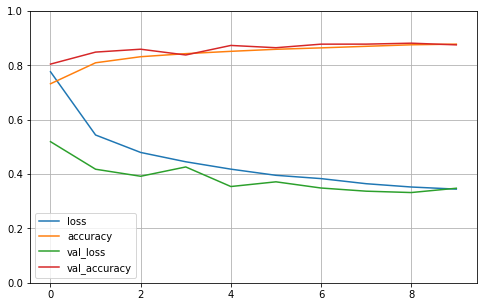

In [13]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [14]:
model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.37121432951688765, 0.8669]

In [ ]:
# tensorboard 展示，命令行下执行，注意：文件目录
# tensorboard --logdir=callbacks